In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
#from sklearn.model_selection import train_test_split

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train_path = 'Dataset\train'
valid_path = 'Dataset\test'

In [6]:
# add preprocessing layer to the front of Resnet
Resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in Resnet.layers:
  layer.trainable = False

In [8]:
folders = glob('Dataset/train/*')
folders

['Dataset/train\\cardboard',
 'Dataset/train\\e-waste',
 'Dataset/train\\glass',
 'Dataset/train\\medical',
 'Dataset/train\\metal',
 'Dataset/train\\paper',
 'Dataset/train\\plastic']

In [9]:
Resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [ ]:
# our layers - you can add more if you want
#x = Flatten()(Resnet.output)
#prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# Classification block

x = Flatten(name='flatten')(Resnet.output)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(len(folders), activation='softmax', name='predictions')(x)

In [11]:
# create a model object
model = Model(inputs=Resnet.input, outputs=x)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\ResNet Version 1\\Dataset\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\ResNet Version 1\\Dataset\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2810 images belonging to 7 classes.
Found 764 images belonging to 7 classes.


In [15]:
# fit the model
r = model.fit(training_set, validation_data=test_set, epochs=35, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/35


C:\Users\SUCHAL\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


88/88 [==============================] - 477s 5s/step - loss: 3.7074 - accuracy: 0.2000 - val_loss: 2.0275 - val_accuracy: 0.2631
Epoch 2/35
88/88 [==============================] - 881s 10s/step - loss: 2.1988 - accuracy: 0.2619 - val_loss: 2.1792 - val_accuracy: 0.2683
Epoch 3/35
88/88 [==============================] - 2321s 27s/step - loss: 2.2211 - accuracy: 0.2776 - val_loss: 2.4752 - val_accuracy: 0.2369
Epoch 4/35
88/88 [==============================] - 266s 3s/step - loss: 2.2722 - accuracy: 0.2918 - val_loss: 2.2500 - val_accuracy: 0.2919
Epoch 5/35
88/88 [==============================] - 248s 3s/step - loss: 2.2034 - accuracy: 0.2957 - val_loss: 2.1668 - val_accuracy: 0.2919
Epoch 6/35
88/88 [==============================] - 240s 3s/step - loss: 1.9530 - accuracy: 0.3555 - val_loss: 1.8926 - val_accuracy: 0.3416
Epoch 7/35
88/88 [==============================] - 241s 3s/step - loss: 2.3352 - accuracy: 0.3246 - val_loss: 3.2679 - val_accuracy: 0.3233
Epoch 8/35
88/88 [===

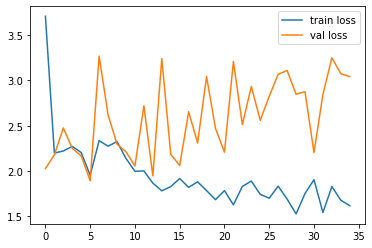

<Figure size 432x288 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

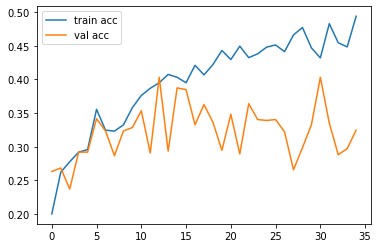

<Figure size 432x288 with 0 Axes>

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('my_Resnet50.h5')


# Prediction Part

In [146]:
y_pred = model.predict(test_set)

24/24 [==============================] - 97s 4s/step


In [147]:
y_pred

array([[1.75458267e-01, 3.13254893e-02, 6.22866809e-01, ...,
        1.20098911e-01, 3.72333750e-02, 1.23801110e-02],
       [1.02642765e-02, 6.26948569e-03, 9.24609423e-01, ...,
        2.85079349e-02, 1.44981863e-02, 1.54018616e-02],
       [7.64685171e-03, 4.37058881e-02, 3.02622497e-01, ...,
        6.22254670e-01, 1.24579351e-02, 1.06012020e-02],
       ...,
       [6.78558946e-01, 6.28258735e-02, 3.98759507e-02, ...,
        2.02296376e-01, 3.24576325e-03, 1.28919855e-02],
       [2.56033093e-01, 2.59365421e-02, 2.22495466e-01, ...,
        4.69808012e-01, 2.17436627e-02, 3.27711203e-03],
       [1.29633560e-03, 1.64191369e-02, 1.41617432e-02, ...,
        9.56080019e-01, 8.15669657e-04, 9.37204156e-03]], dtype=float32)

In [148]:
#from keras.preprocessing.image import load_img
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from skimage.io import imread
from pylab import *

In [149]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [150]:
y_pred

array([2, 2, 4, 1, 2, 0, 2, 1, 4, 4, 4, 0, 1, 3, 6, 4, 4, 1, 4, 0, 4, 4,
       2, 2, 1, 4, 1, 0, 2, 4, 1, 2, 0, 2, 1, 3, 4, 2, 2, 4, 0, 4, 0, 1,
       2, 0, 2, 3, 6, 2, 2, 4, 1, 0, 4, 4, 0, 4, 4, 2, 2, 0, 3, 4, 4, 0,
       4, 4, 4, 5, 4, 5, 1, 4, 4, 0, 6, 4, 0, 6, 5, 4, 2, 4, 4, 4, 5, 2,
       4, 0, 4, 4, 0, 1, 4, 5, 4, 2, 4, 2, 1, 6, 4, 4, 0, 4, 1, 4, 0, 2,
       2, 0, 4, 4, 0, 2, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 0, 2, 4, 0, 4, 2,
       4, 4, 4, 0, 1, 4, 2, 4, 2, 4, 0, 4, 1, 4, 2, 2, 2, 2, 4, 2, 2, 3,
       4, 0, 0, 2, 4, 0, 4, 4, 4, 1, 3, 4, 4, 4, 2, 0, 4, 4, 2, 4, 2, 4,
       4, 4, 4, 4, 0, 2, 5, 4, 0, 1, 2, 4, 5, 1, 2, 4, 4, 4, 0, 4, 0, 4,
       5, 2, 4, 4, 4, 2, 1, 2, 2, 4, 0, 0, 2, 0, 2, 2, 3, 0, 2, 4, 2, 3,
       2, 4, 2, 4, 0, 0, 0, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 2, 0, 0,
       5, 4, 1, 1, 4, 6, 2, 2, 4, 1, 4, 4, 2, 4, 1, 2, 5, 4, 2, 4, 4, 1,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 3, 4, 0, 0, 4, 2, 4, 4, 0, 2,
       4, 5, 1, 4, 2, 4, 4, 2, 1, 4, 4, 0, 1, 2, 2,

In [151]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [152]:
model=load_model('my_Resnet50.h5')

In [153]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

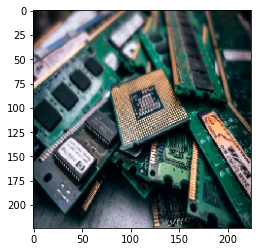

In [164]:
from tensorflow.keras.preprocessing import image
img=image.load_img("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\ResNet Version 1\\Dataset\\test\\e-waste\\e-waste 796.jpg",target_size=(224,224))
imshow(img)

In [165]:
x=image.img_to_array(img)
x

array([[[15., 22., 28.],
        [17., 24., 30.],
        [16., 23., 29.],
        ...,
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.]],

       [[10., 17., 23.],
        [11., 18., 24.],
        [11., 18., 24.],
        ...,
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.]],

       [[ 7., 14., 20.],
        [ 8., 15., 21.],
        [ 8., 15., 21.],
        ...,
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.],
        [ 1.,  2.,  7.]],

       ...,

       [[52., 69., 77.],
        [63., 80., 88.],
        [70., 84., 93.],
        ...,
        [14., 54., 53.],
        [15., 60., 57.],
        [16., 69., 63.]],

       [[44., 61., 69.],
        [56., 73., 81.],
        [55., 69., 78.],
        ...,
        [ 0., 36., 35.],
        [ 0., 39., 36.],
        [13., 66., 60.]],

       [[58., 75., 83.],
        [49., 66., 74.],
        [57., 71., 80.],
        ...,
        [11., 43., 42.],
        [ 0., 38., 35.],
        [ 0., 40., 37.]]

In [166]:
x.shape


(224, 224, 3)

In [167]:
#x=x/255

In [168]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [169]:
img_data

array([[[[ -75.939   ,  -94.779   , -108.68    ],
         [ -73.939   ,  -92.779   , -106.68    ],
         [ -74.939   ,  -93.779   , -107.68    ],
         ...,
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ]],

        [[ -80.939   ,  -99.779   , -113.68    ],
         [ -79.939   ,  -98.779   , -112.68    ],
         [ -79.939   ,  -98.779   , -112.68    ],
         ...,
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ]],

        [[ -83.939   , -102.779   , -116.68    ],
         [ -82.939   , -101.779   , -115.68    ],
         [ -82.939   , -101.779   , -115.68    ],
         ...,
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ],
         [ -96.939   , -114.779   , -122.68    ]],

        ...,

        [[ -26.939003,  -47.779   ,  -

In [170]:
model.predict(img_data)


1/1 [==============================] - 0s 245ms/step


array([[0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [171]:
#1: cardboard, 2:e-waste, 3:glass, 4:medical, 5:metal, 6:paper, 7:plastic.

In [172]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 251ms/step


In [173]:
a==1

array([ True])